In [ ]:
# 문제정의 
## 영화관객 수 예측
감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들고자 한다. 
- y: next_arrive_time
- x: 영화 관객 수에 영향을 주는 요소들(Data Set에서 columns)

### 데이터 불러오기

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [163]:
train = pd.read_csv('./movies_train.csv')
test = pd.read_csv('./movies_test.csv')


### 데이터프레임 정보 확인하기

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [165]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083


1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [166]:
### 결측치를 찾음 
train.isnull().sum()
## dir_prev_bfnum 에 결측치가 있음. 아마 제작에 참여한 적이 없는 것 같음

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [167]:
train[train['dir_prev_bfnum'].isnull()]
# dir_prev_num에 0이 대입되어 있으니 dir_prev_bfnum에 0을 집어넣음 

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [168]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)

In [169]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [170]:
## release_time을 year, month로 따로 컬럼을 만들어줌
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].apply(lambda x: x.year )
train['month'] = train['release_time'].apply(lambda x: x.month )

In [171]:
train.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11


### 종속변수 탐색

In [172]:
pd.options.display.float_format = '{:.5f}'.format
# 지수표현식이 아닌 실수표현으로 보기 위한 설정

In [173]:
# 종속변수의 기초통계량을 살펴봄
train['box_off_num'].describe()

count        600.00000
mean      708181.75167
std      1828005.85114
min            1.00000
25%         1297.25000
50%        12591.00000
75%       479886.75000
max     14262766.00000
Name: box_off_num, dtype: float64

<AxesSubplot:>

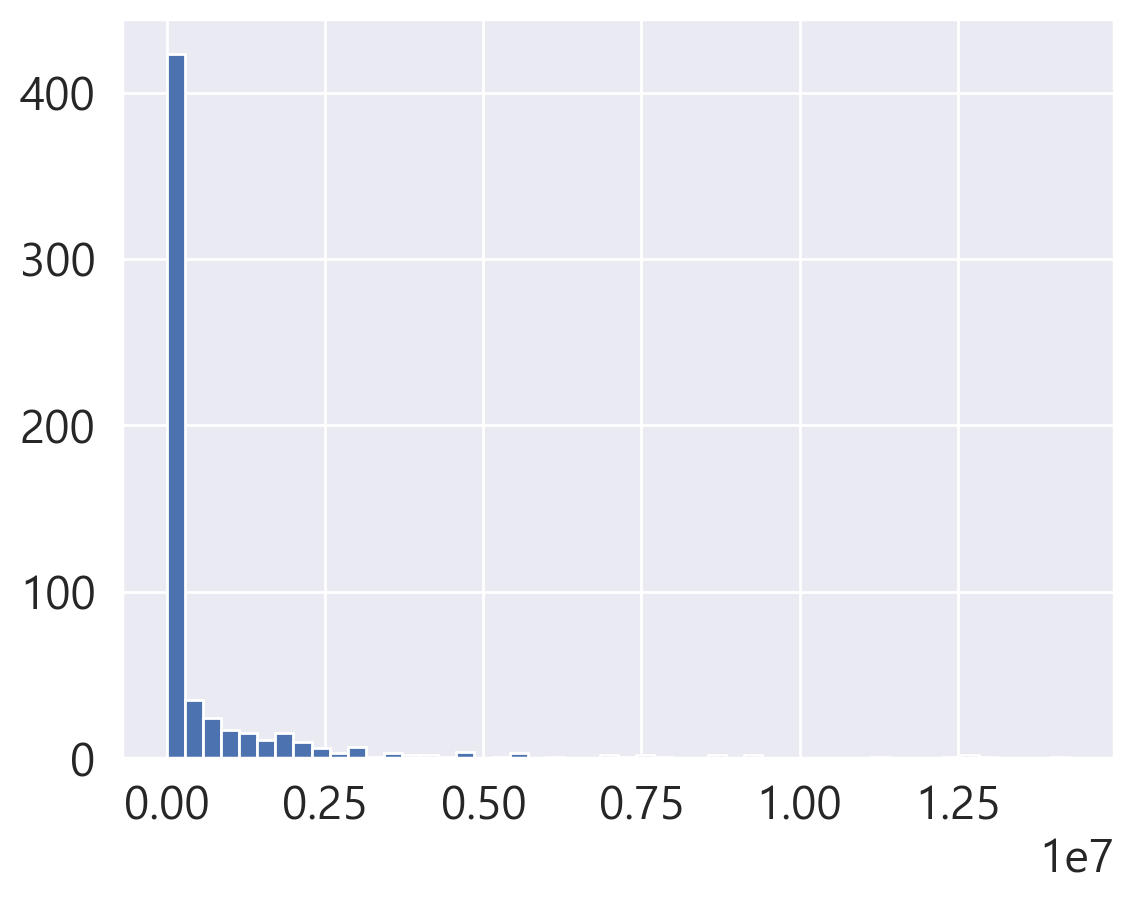

In [174]:
# 시각화
train['box_off_num'].hist(bins=50)
# 0에 가까운 숫자가 많다..

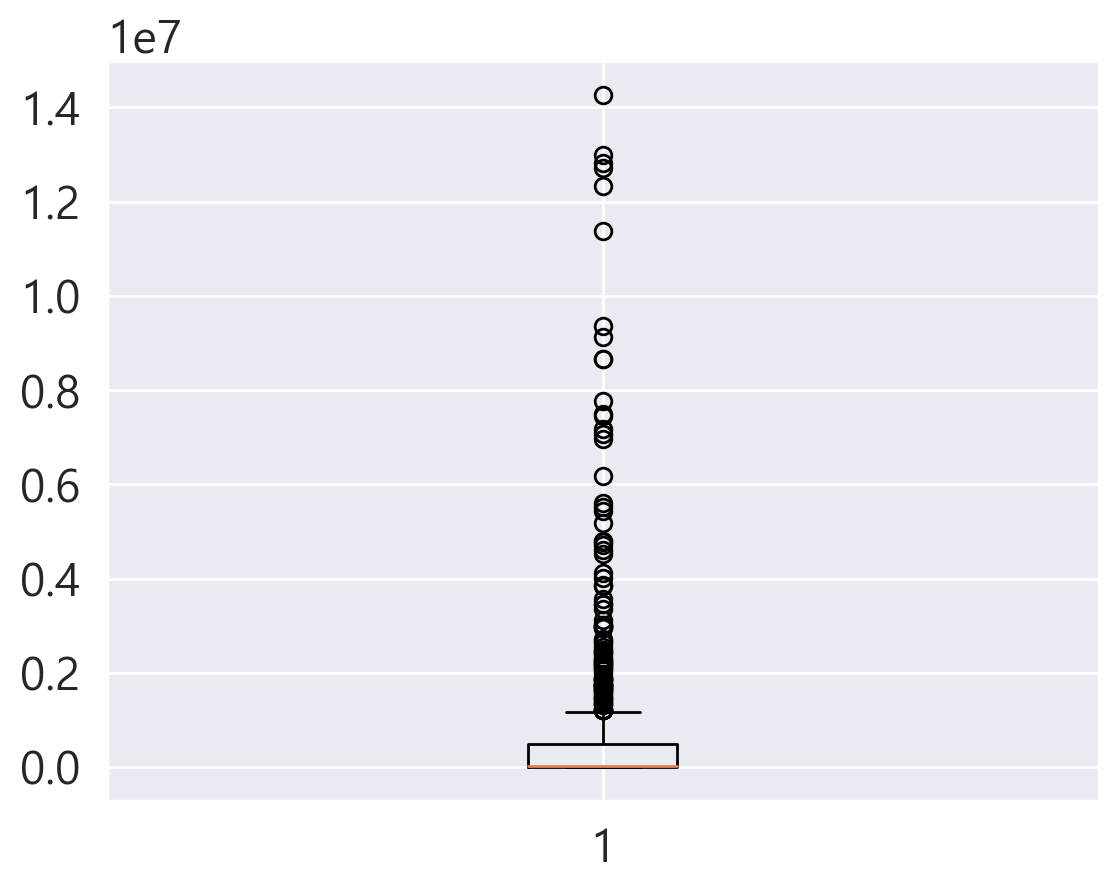

In [175]:
plt.boxplot(train['box_off_num'])
plt.show()
# 1부터 14262766 까지 다양한 관객수로 분포되어 있다. 

### 독립변수 살펴보기

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_36708\1033923574.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train[numerical_columns].hist(ax=ax)


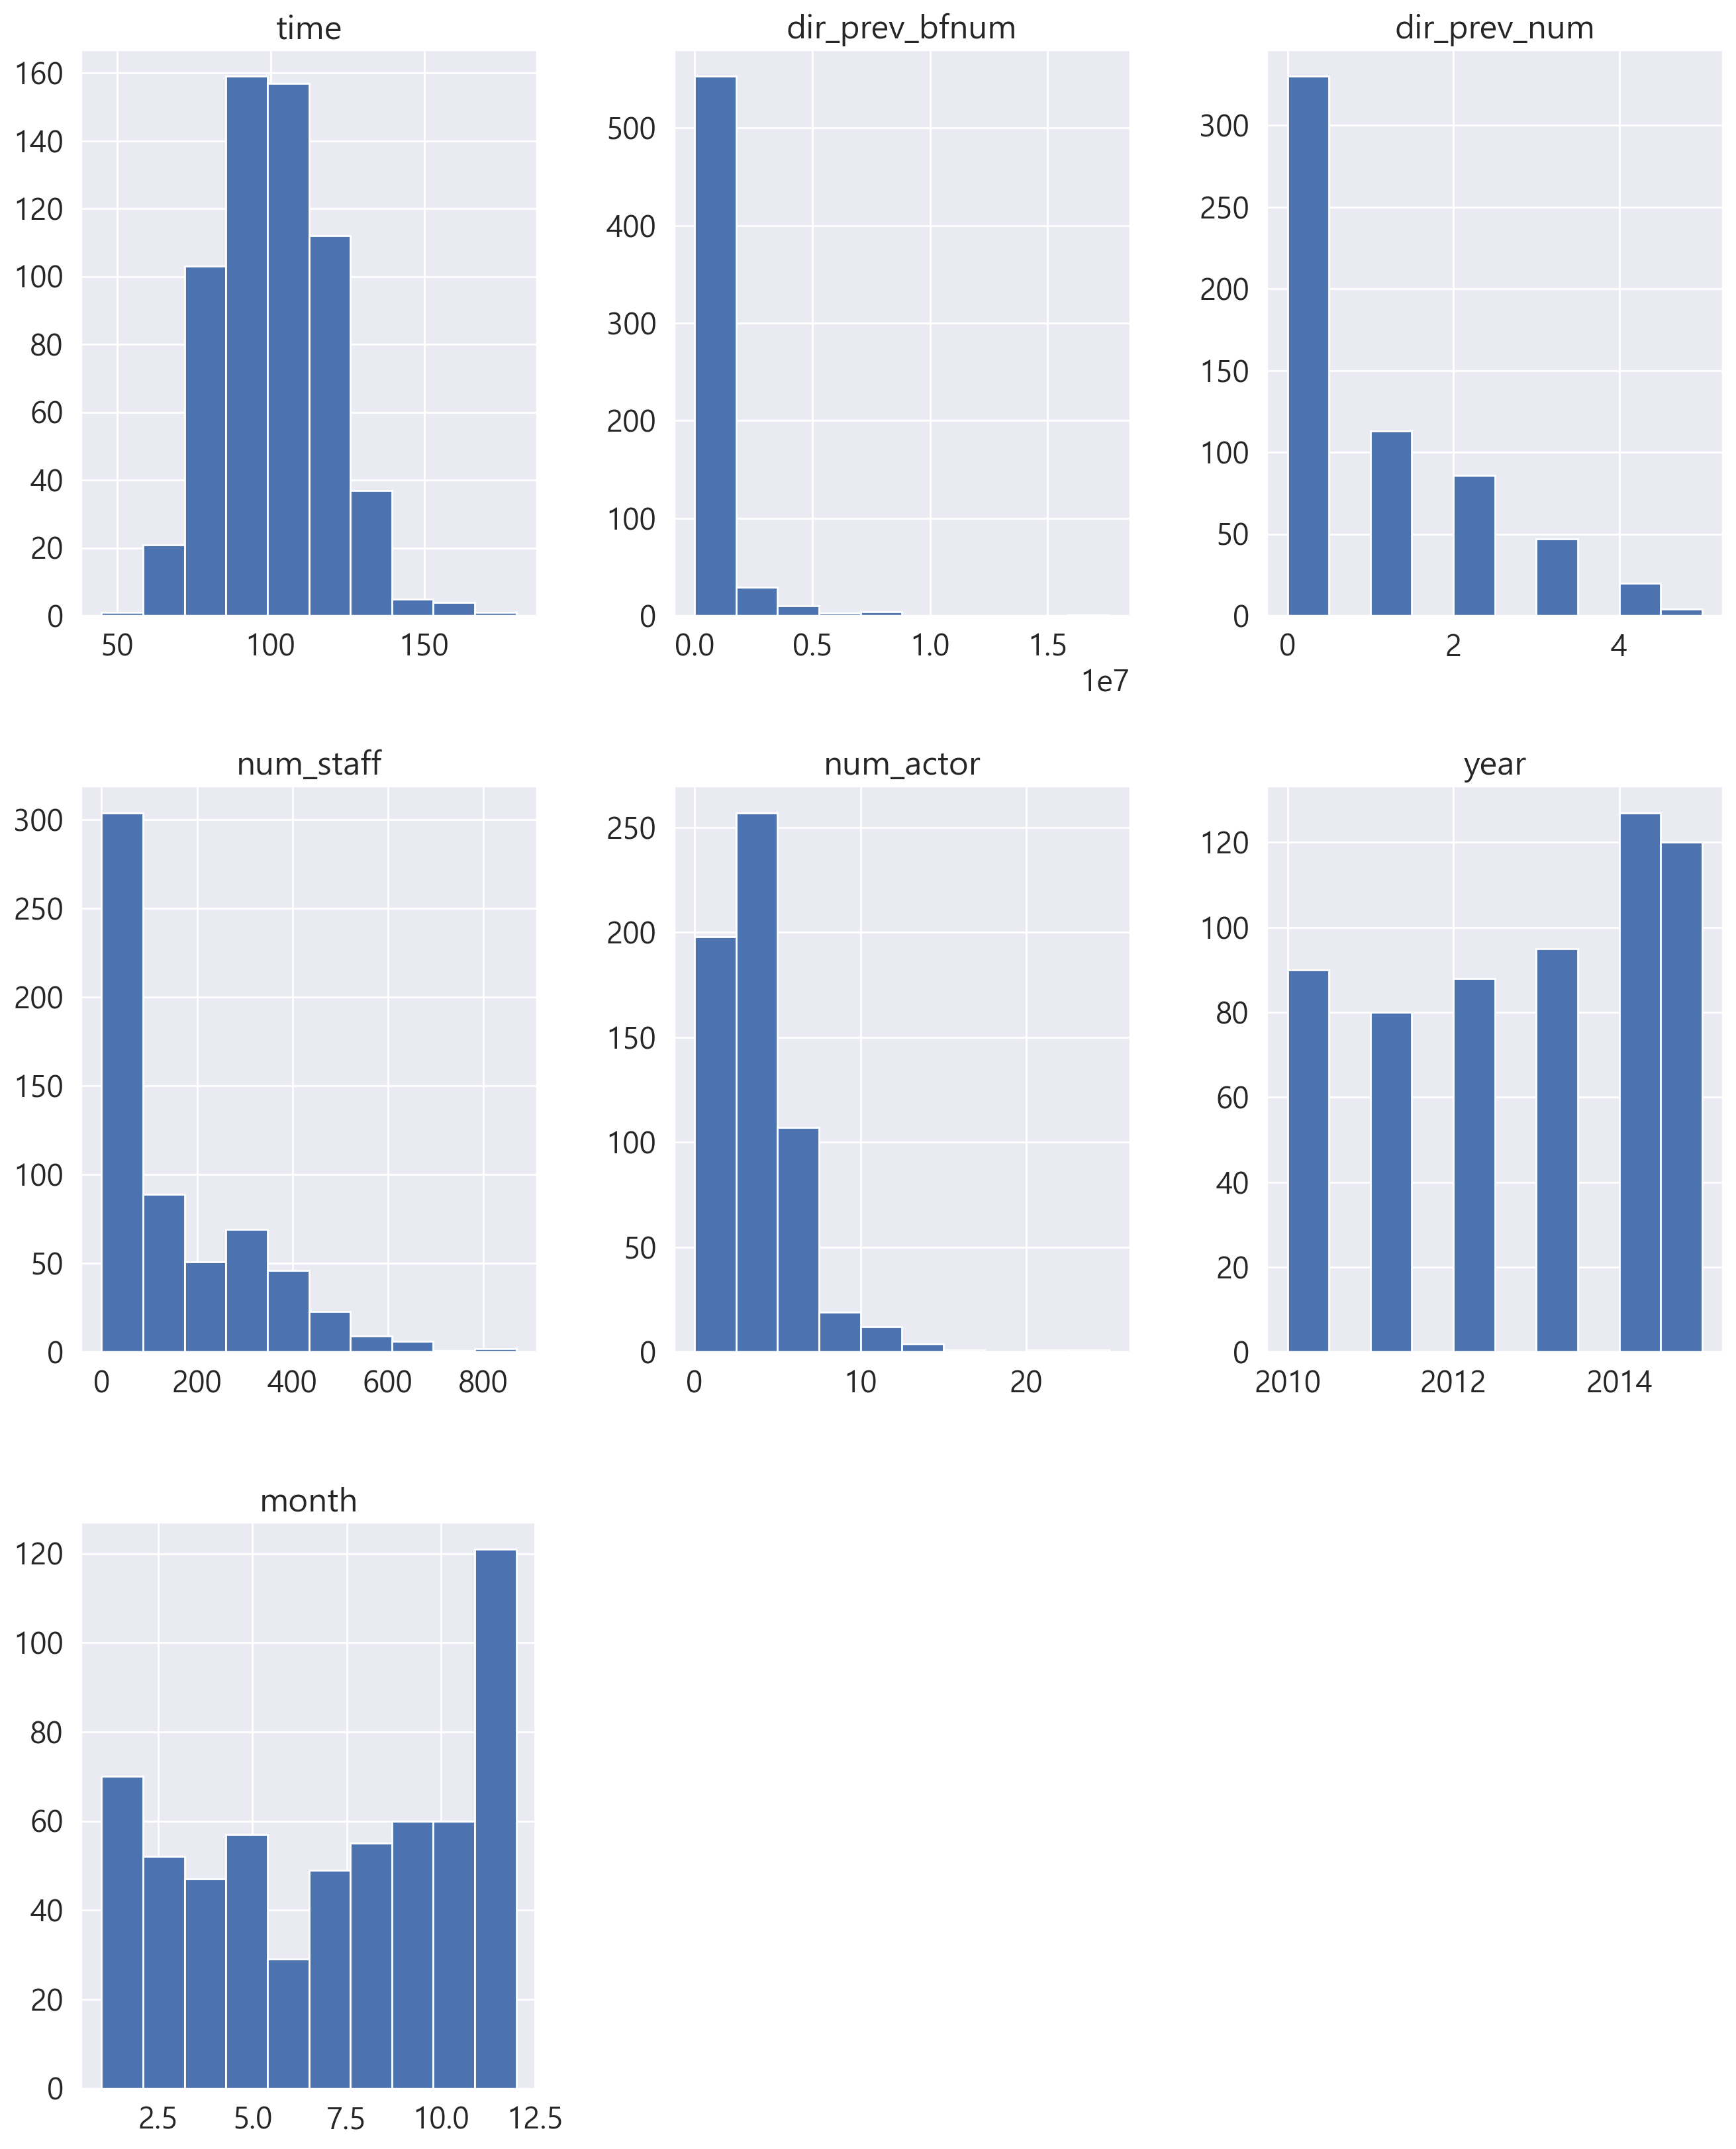

In [177]:
#numerical features
numerical_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','year','month']

fig = plt.figure(figsize=(16,20))
ax = fig.gca()

train[numerical_columns].hist(ax=ax)
plt.show()
# dir_prev_bfnum와 그래프가 유사한 걸로 봐서 관련이 있어 보인다. 

### 독립변수와 종속변수 간의 관계 탐색

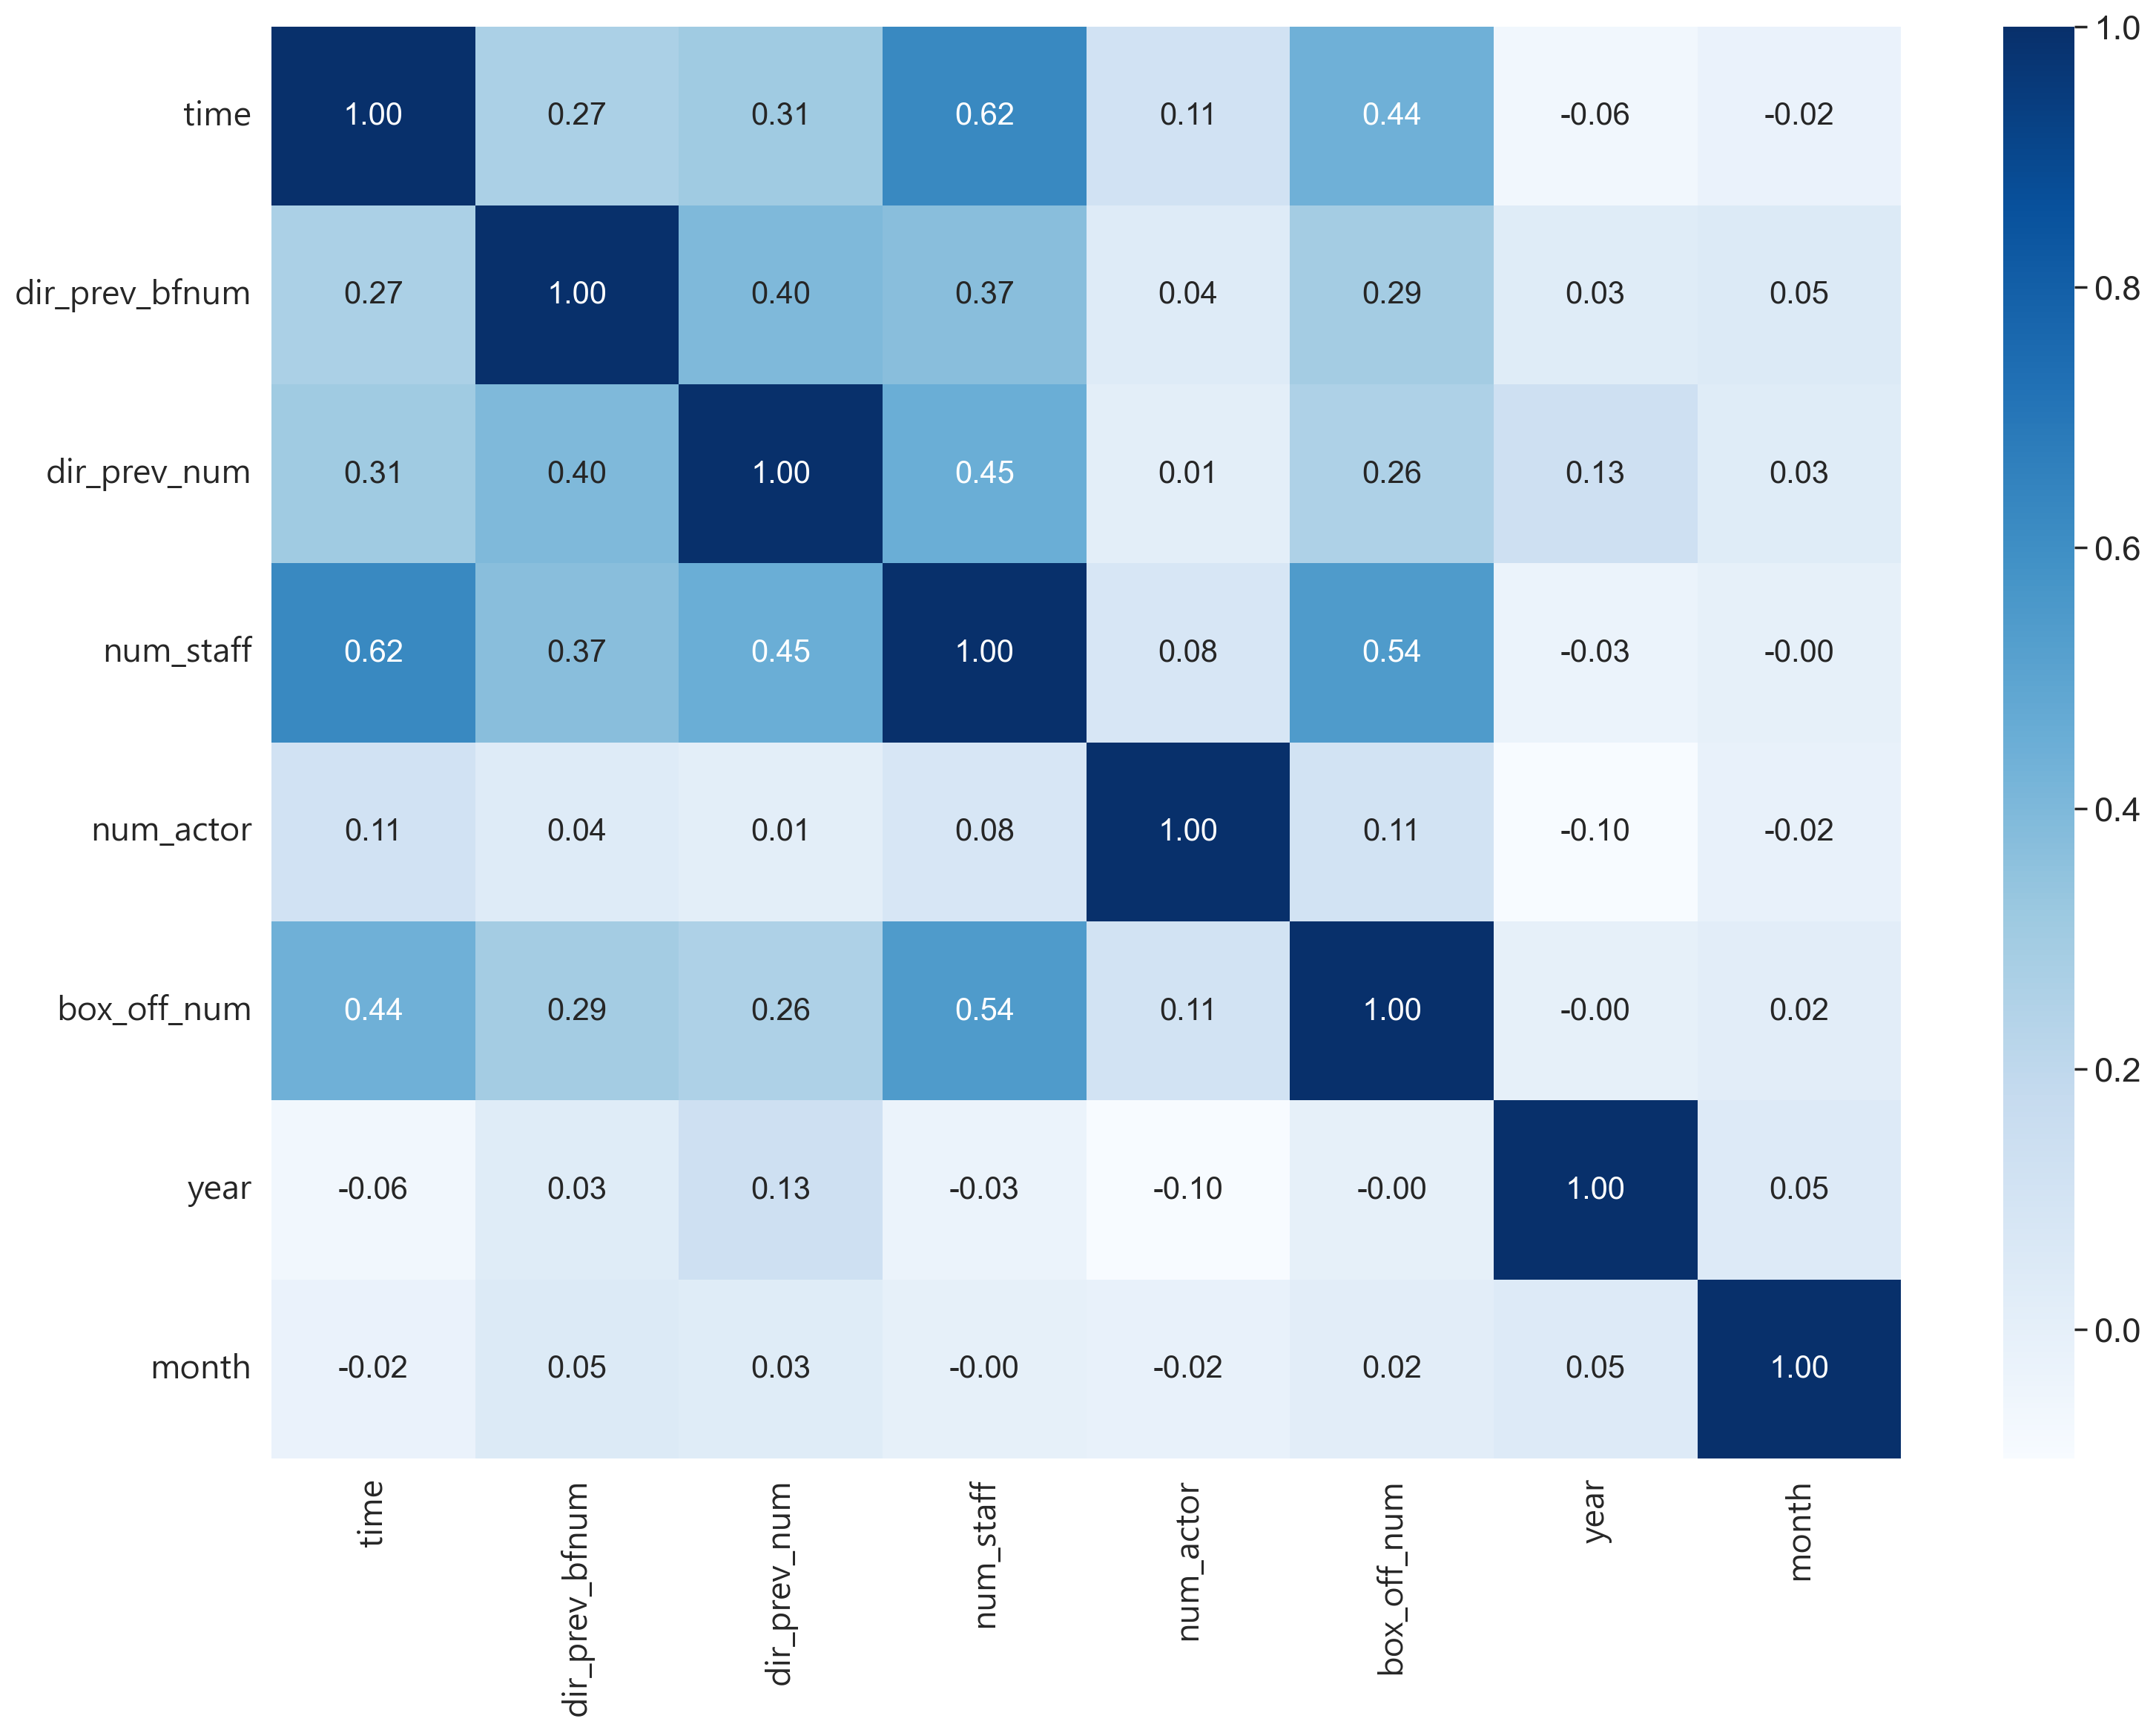

In [178]:
cols = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','box_off_num','year','month']

corr = train[cols].corr(method = 'pearson')

fig = plt.figure(figsize=(16,12))
ax = fig.gca()

sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr.values, annot= True, fmt= '.2f',annot_kws={'size':15},
                     yticklabels = cols, xticklabels = cols, ax=ax, cmap='Blues')

plt.tight_layout()
plt.show()

In [179]:
## 종속변수와의 상관관계를 살펴보면
# 0.5를 넘는 것이 num_staff밖에 없어 양의 상관관계는 파악할 수 없다. 
## year가 -0.0인 것으로보아 관객수에는 완전한 음의 상관관계이다. 

### 독립변수와 종속변수 간의 관계 탐색 

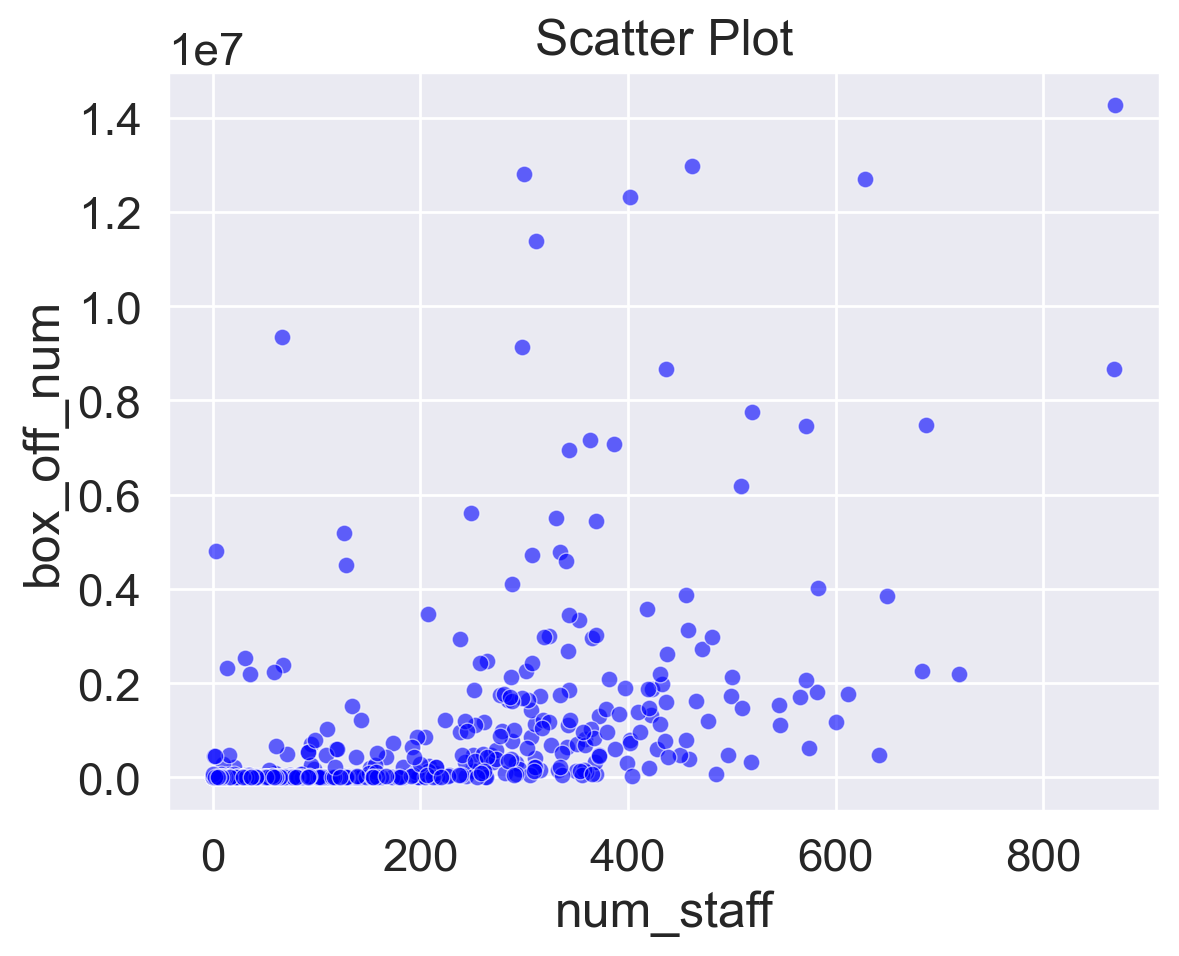

In [180]:
sns.scatterplot(data=train, x='num_staff', y='box_off_num', markers = 'o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [181]:
## 영화 관객의 수와 num_staff는 상관관계를 갖고 있지 않다. 
# 즉 스태프의 숫자는 영화 관객의 수에 영향을 주지 않는다. 

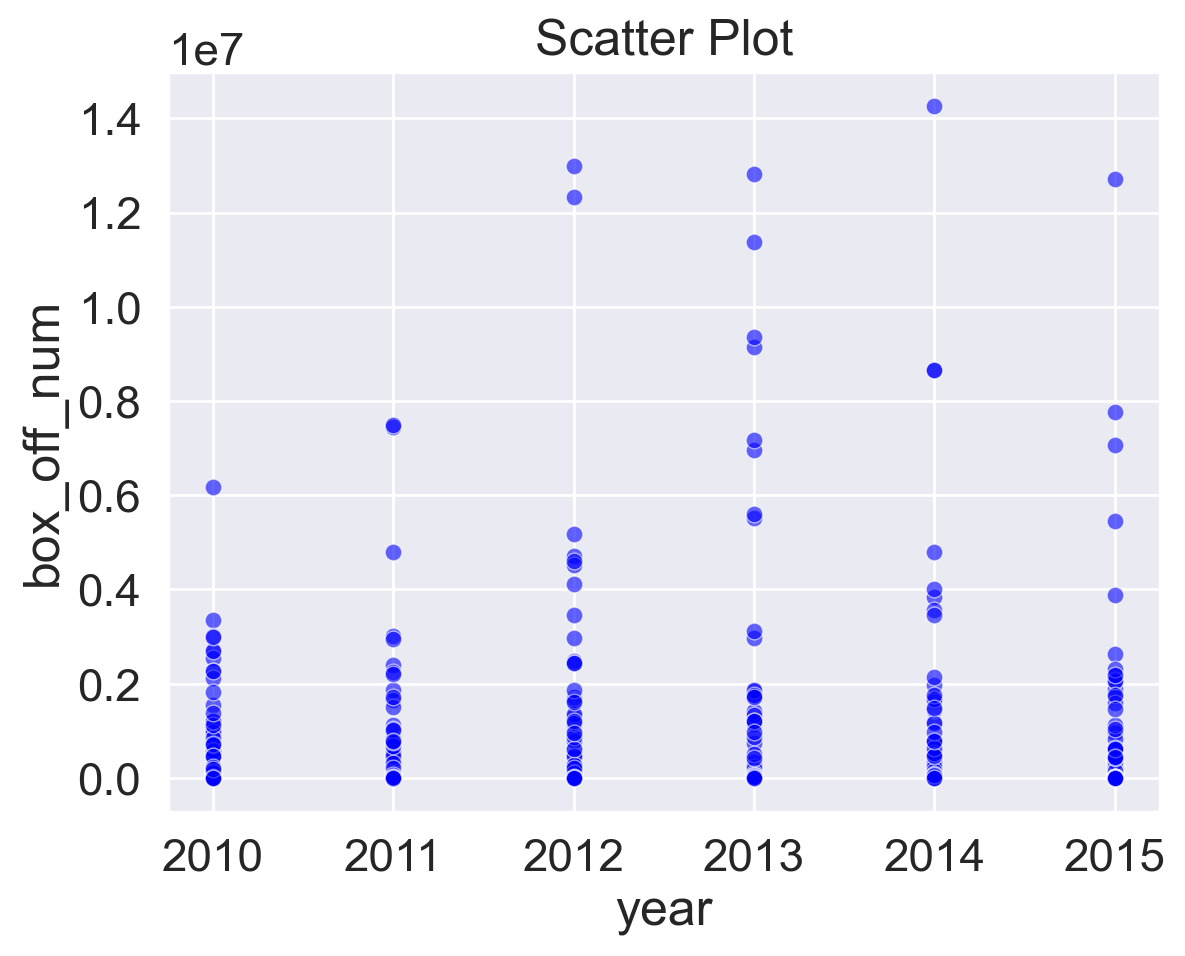

In [182]:
sns.scatterplot(data=train, x='year', y='box_off_num', markers = 'o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [183]:
## year는 관객수에 영향을 미치지 않는다

### 장르별 차이 탐색
영화 관객 수에는 장르가 관련이 있다고 생각하기에 장르별 차이를 탐색한다. 
1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [184]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values(by='box_off_num')
## 느와르의 관객수가 가장 많다.

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


In [185]:
# 그래프를 그리기 전 한글폰트 설정을 해준다. 
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_36708\714562975.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<AxesSubplot:xlabel='box_off_num', ylabel='genre'>

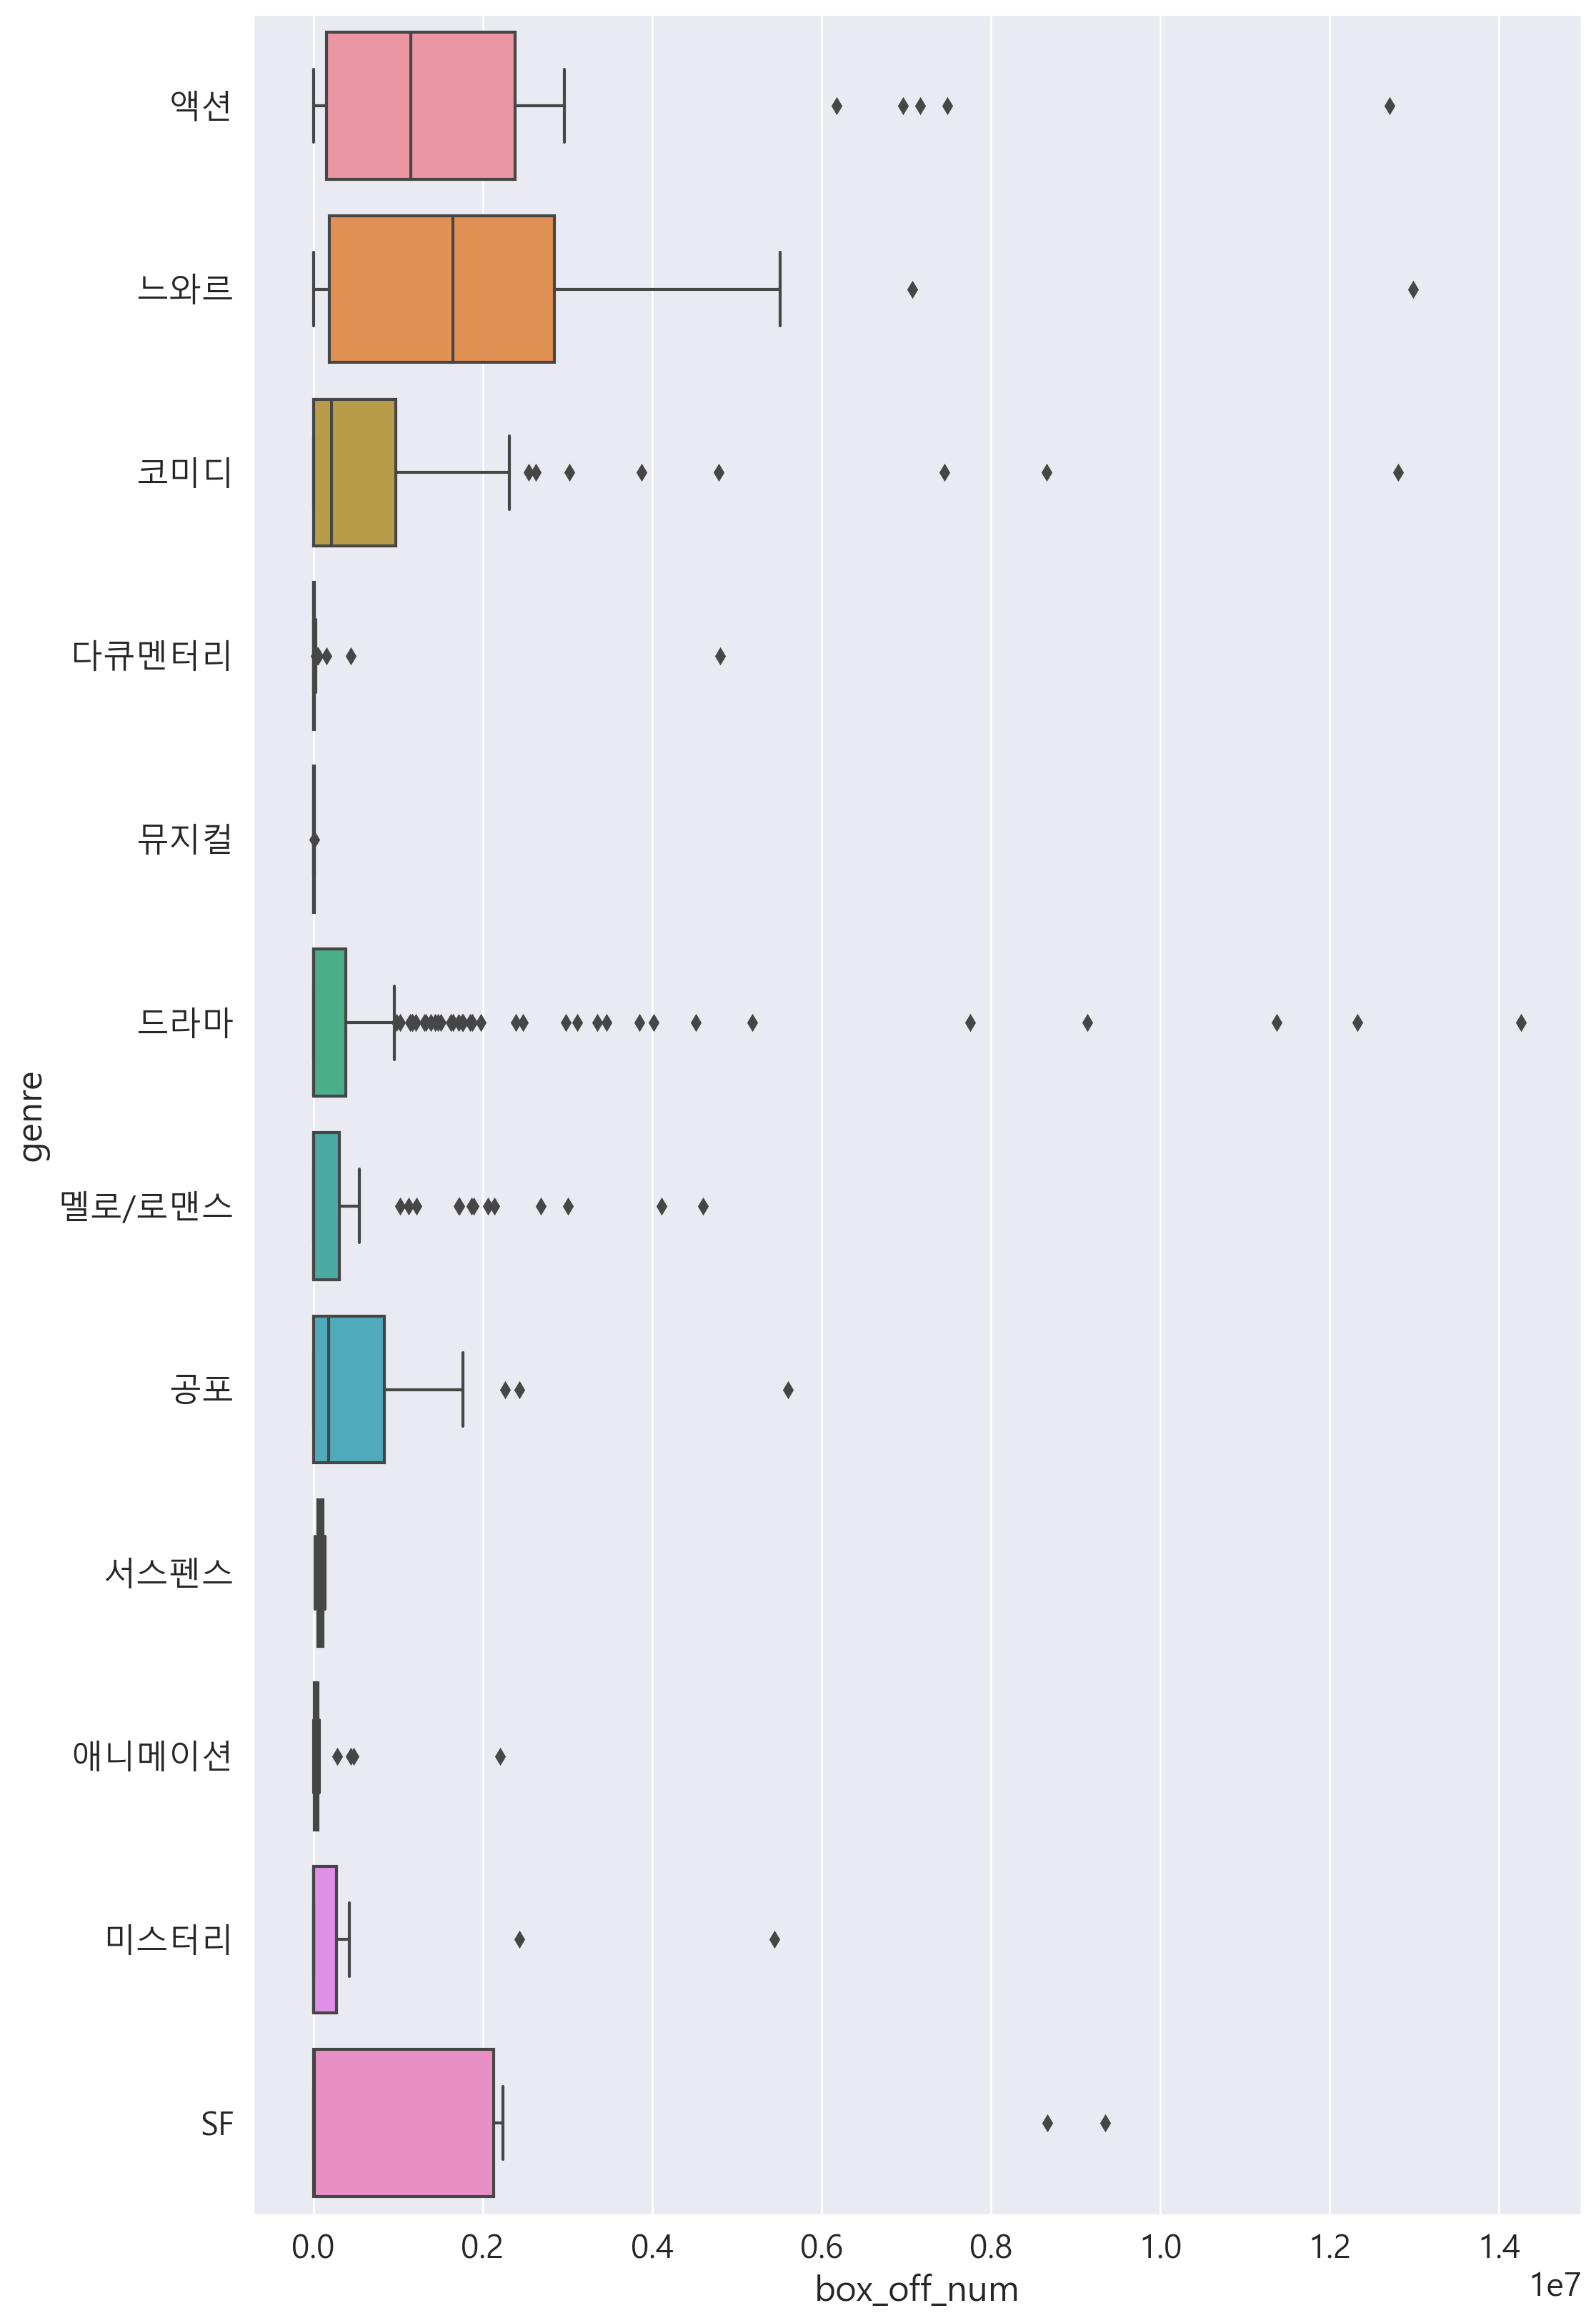

In [186]:
# 장르별 관객수 (boxplot이용)
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='genre',data=train)

In [187]:
## 다큐, 뮤지컬, 서스펜스, 애니메이션의 관객수는 상대적으로 적다. 
## 느와르 장르를 많이 보는 걸 볼 수 있다. 

<AxesSubplot:xlabel='dir_prev_num', ylabel='genre'>

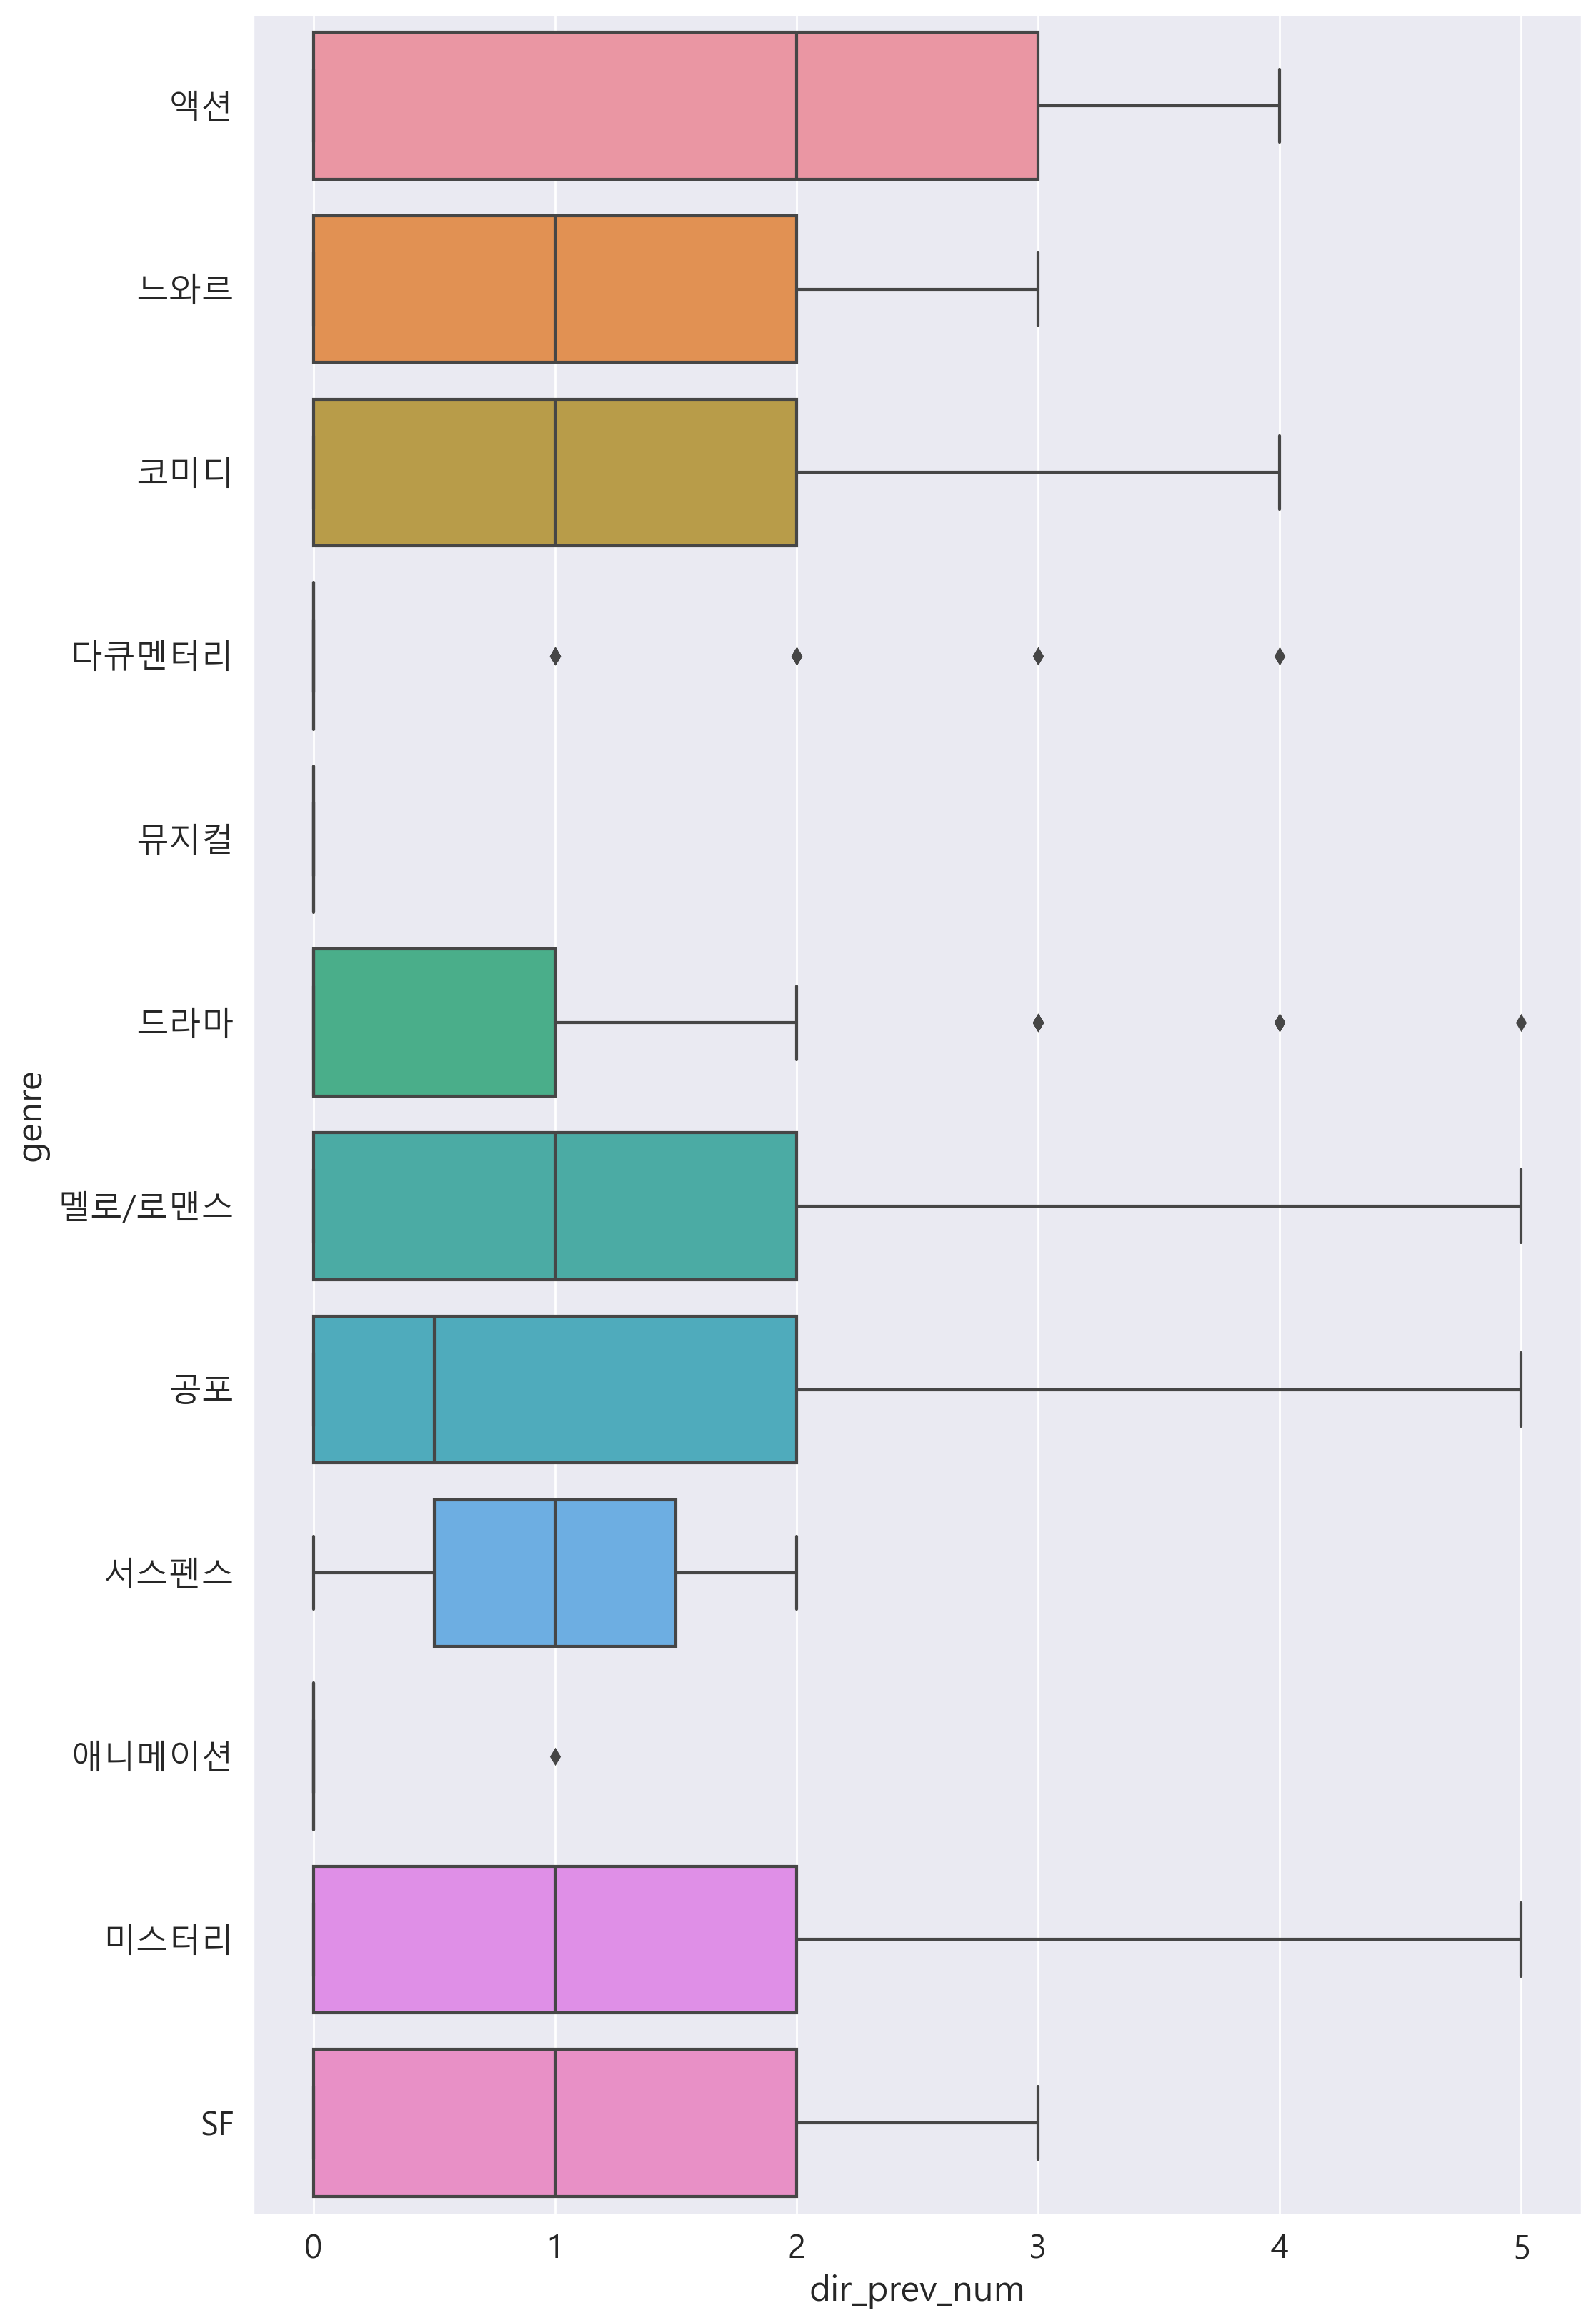

In [188]:
# 장르와 dir_prev_num의 특징을 살펴보겠다. 
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='dir_prev_num',y='genre', data=train)

In [189]:
## 만드는 것에 난이도가 높은 액션, 느와르, SF는 
## 영화를 제작하기 전 제작에 참여한 개수가 높을 것 같았는데 예상이 맞았고, 
## 다큐, 뮤지컬, 애니메이션은 제작에 처음 참여한 감독이 많다. 새로운 신입감독이 제작을 하는 것은 관객수가 적은 것 같다. 

### 감독별 차이 탐색
- 영화를 선택할 때 감독이 누구인지도 많은 관련성이 있다고 생각하여 감독별 차이를탐색하고자 한다. 

In [190]:
director = train['director'].unique()

In [191]:
print(len(director))
# director의 유효한 값이 너무 많아서 누적관객수 상위 20명의 감독만 보려고 한다. 

472


In [192]:
director = train[['director','title','box_off_num']].sort_values(by='box_off_num',ascending=False)

In [193]:
director_top20 = director.groupby('director').sum()['box_off_num'].sort_values(ascending=False).head(20)
director_top20 = director_top20.reset_index()
director_top20

,director,box_off_num
0,최동훈,25690504
1,이석훈,16425919
2,윤제균,14262766
3,추창민,13973002
4,이환경,13347092
5,우민호,11480550
6,강형철,11469079
7,양우석,11374879
8,류승완,9889560
9,봉준호,9350351


<AxesSubplot:xlabel='box_off_num', ylabel='director'>

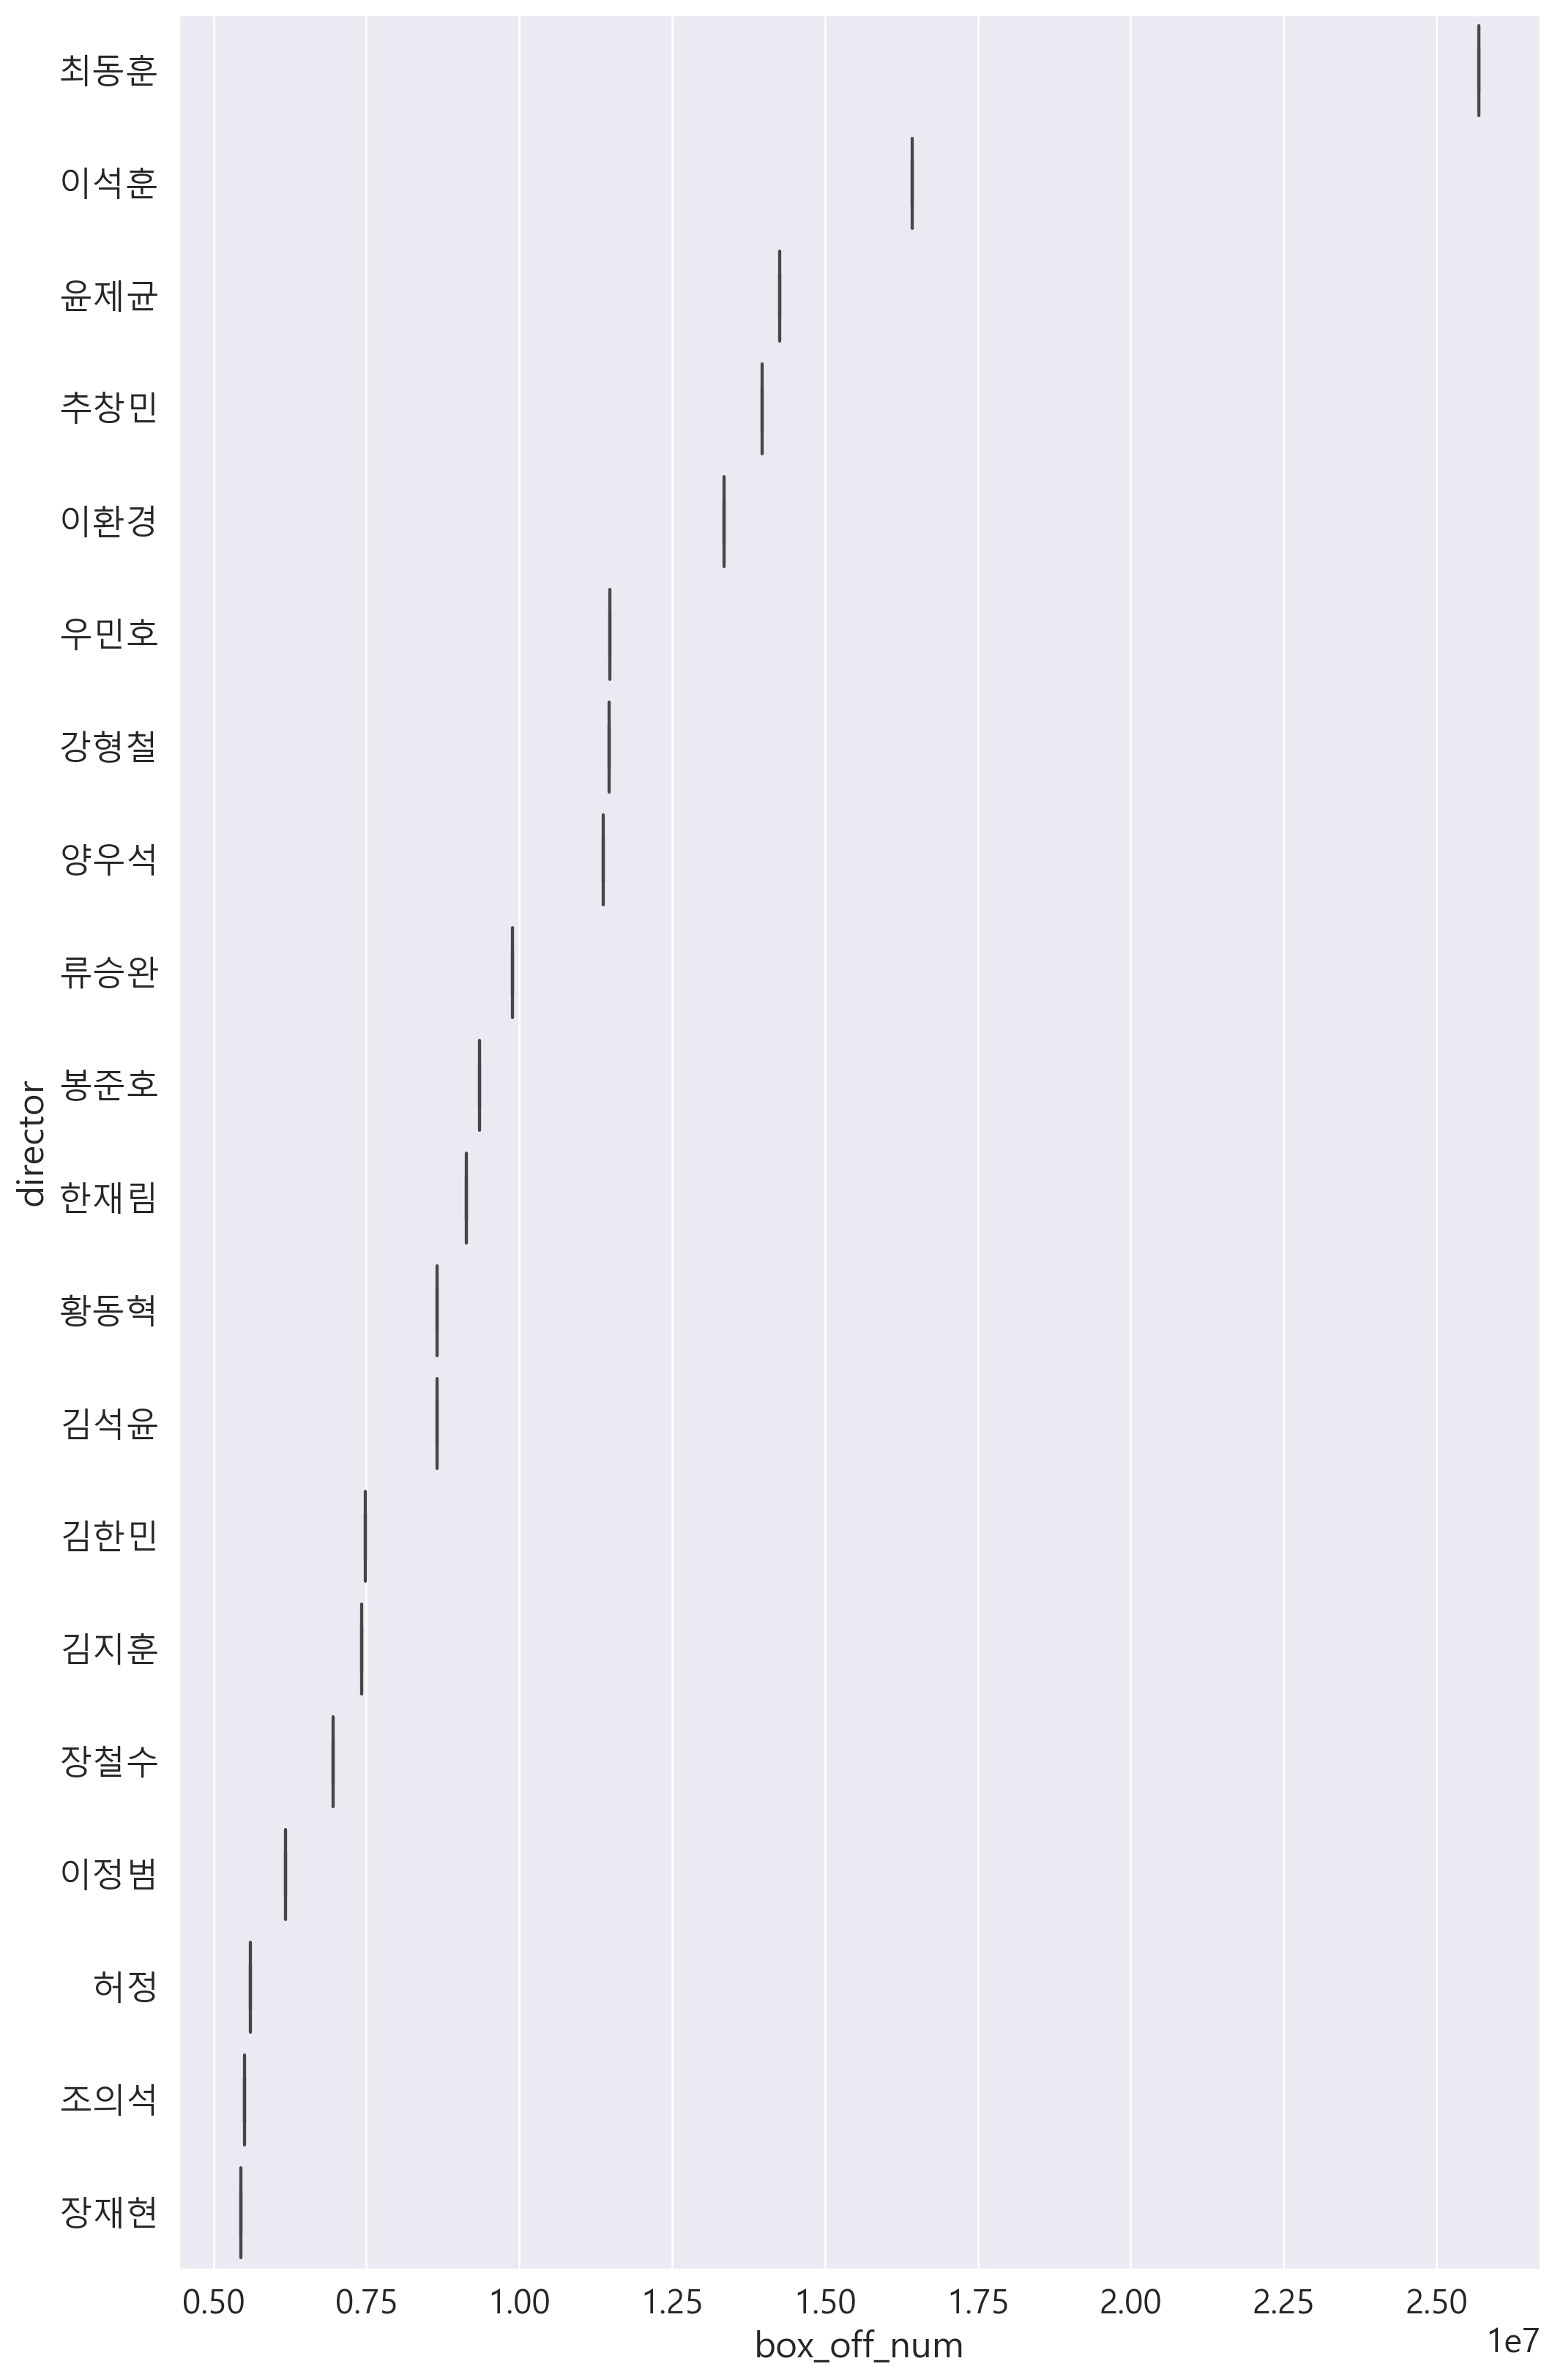

In [194]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num',y='director', data=director_top20)

In [195]:
## 암살과 도둑들의 감독인 최동훈의 영화는 관객수가 많았다. 

### 관객수 예측 모델링

In [196]:
train.head(3)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

### 데이터 전처리


#### 범주형 데이터를 더미변수로
영화 관객수는 감독이 누구인지에 따라 변한다고 생각한다. 따라서 범주형 데이터인 'director'를 더미변수로 전환해주고 분석을 진행해주겠다.  


# 더미변수를 스케일링 했을 때!!
원래 더미변수는 스케일링 하지 않는 것이 원칙이지만, 데이터들이 0에 가까운게 많아 스케일링 했음 
더미변수 스케일링 한 버전 vs 더미변수 스케일링 하지 않은 버전 비교하는 것이 좋을듯

In [224]:
train_dummies = pd.get_dummies(train, columns=['director', 'genre'])
train_dummies.head(3)

,title,distributor,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,청소년 관람불가,0.00000,0,91,2,23398,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,(주)쇼박스,2015-11-19,130,청소년 관람불가,1161602.50000,2,387,3,7072501,...,1,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,(주)쇼박스,2013-06-05,123,15세 관람가,220775.25000,4,343,4,6959083,...,0,0,0,0,0,0,0,0,1,0


In [225]:
## 사용하지 않을 컬럼들은 제거해준다.
train_dummies = train_dummies.drop(['title','distributor', 'release_time','screening_rat'],axis=1)

#### 표준화
- Feature들의 scale차이를 없애기 위해 표준화를 진행한다. 
- 문자형 변수인 'title', 'distributor', 'genre', 'screening_rat', 'director'와 datetime 변수인 'release_time'은 제외한다. 

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = [col for col in train_dummies.columns if col != 'box_off_num']
train_dummies[scale_columns] = scaler.fit_transform(train_dummies[scale_columns])


In [227]:
train_dummies[scale_columns].head(3)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month,director_New Pistol,director_강석필,director_강성옥,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,-0.26895,-0.36129,-0.74142,-0.36322,-0.69807,-0.43362,1.17585,-0.04086,-0.04086,-0.04086,...,-0.21707,-0.42829,-0.76362,-0.38656,-0.09167,-0.17076,-0.05783,-0.19045,4.51980,-0.31128
1,1.61132,0.52653,0.95003,1.42512,-0.28904,1.30472,1.17585,-0.04086,-0.04086,-0.04086,...,4.60676,-0.42829,-0.76362,-0.38656,-0.09167,-0.17076,-0.05783,-0.19045,-0.22125,-0.31128
2,1.22421,-0.19255,2.64147,1.15929,0.11998,0.14583,-0.29826,-0.04086,-0.04086,-0.04086,...,-0.21707,-0.42829,-0.76362,-0.38656,-0.09167,-0.17076,-0.05783,-0.19045,4.51980,-0.31128


#### training/test set 나누기

In [228]:
from sklearn.model_selection import train_test_split

X = train_dummies[scale_columns]
y = train_dummies['box_off_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [229]:
X_train.shape, y_train.shape

((480, 491), (480,))

In [230]:
X_test.shape, y_test.shape

((120, 491), (120,))

#### 다중공산성 판단

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

C:\Users\ahneunjeong\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\ahneunjeong\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF Factor
0,time,10.20000
1,dir_prev_bfnum,101.60000
2,dir_prev_num,39.80000
3,num_staff,30.50000
4,num_actor,7.70000
...,...,...
486,genre_미스터리,inf
487,genre_서스펜스,inf
488,genre_애니메이션,inf
489,genre_액션,inf


In [233]:
vif.iloc[100]

features      director_김지훈
VIF Factor             inf
Name: 100, dtype: object

### 회귀모델링

In [234]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

In [235]:
coefs = pd.DataFrame(zip(train_dummies[scale_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,time,-15559.11680
1,dir_prev_bfnum,-774765.36618
2,dir_prev_num,-186761.29497
3,num_staff,835988.11594
4,num_actor,4563.90863
...,...,...
486,genre_미스터리,-69219109229548936.00000
487,genre_서스펜스,5803749844959430656.00000
488,genre_애니메이션,-285142380092848448.00000
489,genre_액션,-87992224710303728.00000


In [236]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
360,director_장유정,-120911544641009680384.00000
281,director_이근우,83829963386086555648.00000
444,director_하원준,-83815748799412682752.00000
267,director_윤기형,68118408834051538944.00000
390,director_정윤수,-58079876116519665664.00000
...,...,...
415,director_지민,0.00000
359,director_장성수,-0.00000
400,director_조병옥,-0.00000
456,director_한종훈,0.00000


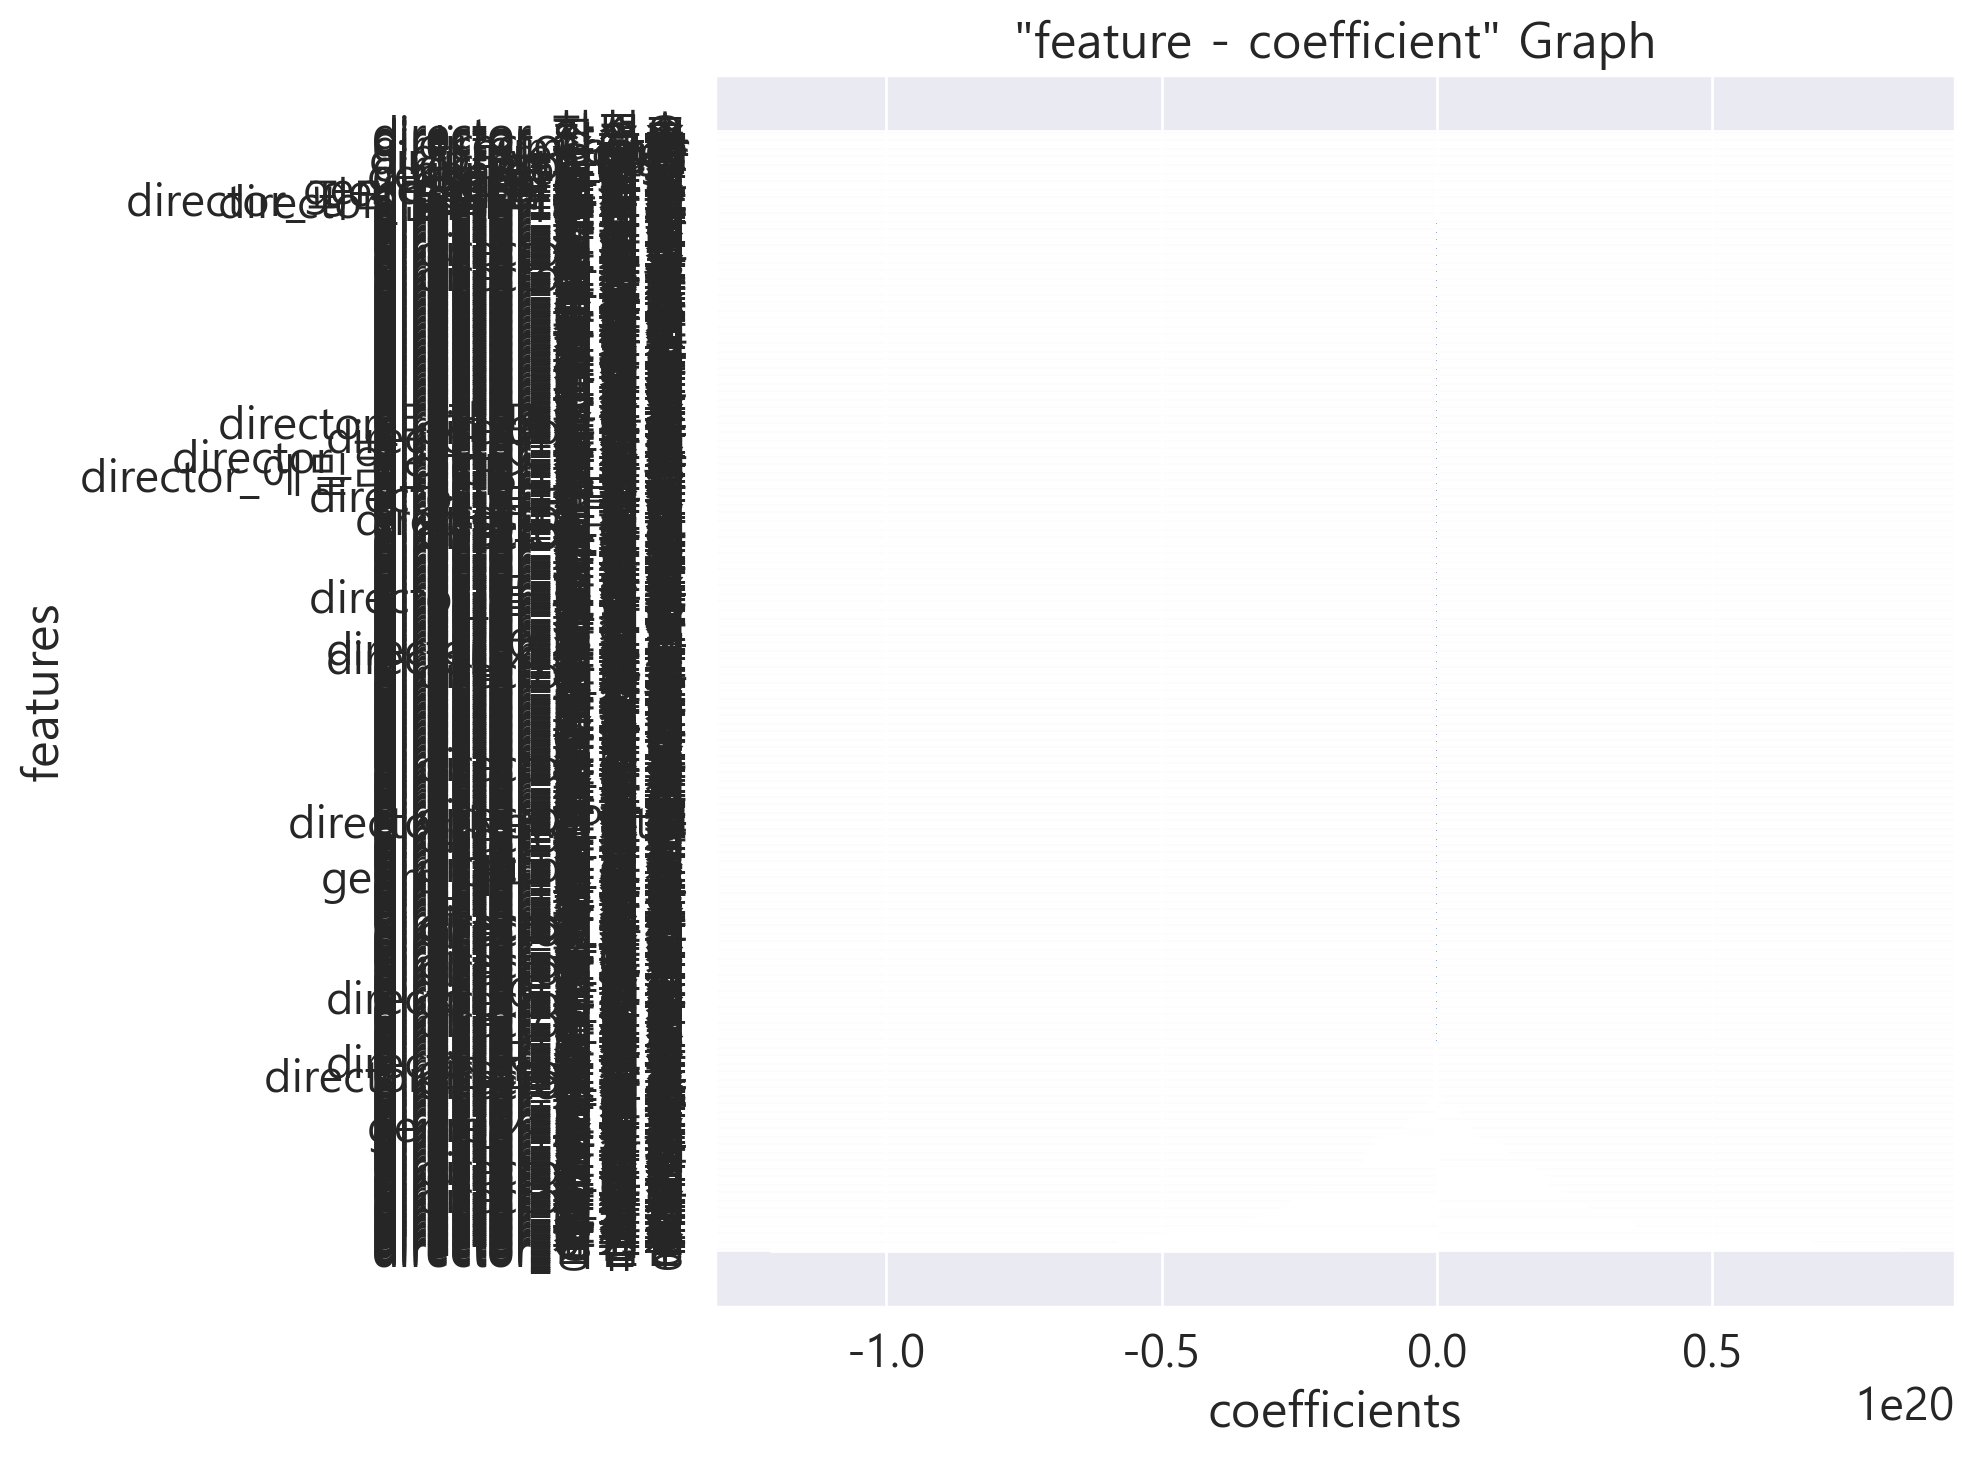

In [237]:
plt.figure(figsize = (8, 8))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

### 유의성 검정

In [238]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()
# p-value는 0.05보다 작을 때 유의미함, 정확도
# p-value가 0.05보다 클 때는 고려하지 않음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            box_off_num   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1.870
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000821
Time:                        17:34:36   Log-Likelihood:                -7045.2
No. Observations:                 480   AIC:                         1.491e+04
Df Residuals:                      71   BIC:                         1.662e+04
Df Model:                         408                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
time                -1.818e+04   2.19e+05     -0.083      0.934   -4.55e+05    4.19e+05
dir_prev_bfnum      -7.788e+05   6.49e+05     -1.199      0.234   -2.07e+06    5.16e+05
dir_prev_num        -1.887e+05   4.29e+05     -0.440      0.661   -1.04e+06    6.67e+05
num_staff            8.384e+05   3.79e+05      2.214      0.030    8.34e+04    1.59e+06
num_actor            3312.6344   1.77e+05      0.019      0.985    -3.5e+05    3.56e+05
year                 2.056e+05   1.99e+05      1.031      0.306   -1.92e+05    6.03e+05
month               -1.037e+05   1.74e+05     -0.597      0.552    -4.5e+05    2.43e+05
director_New Pistol -7.037e+04   7.13e+04     -0.987      0.327   -2.13e+05    7.19e+04
director_강석필         1.581e+04   7.02e+04      0.225      0.822   -1.24e+05    1.56e+05
director_강성옥         2.759e+04   7.13e+04      0.387      0.700   -1.15e+05     1.7e+05
director_강우석         9.482e+04   7.46e+04      1.271      0.208   -5.39e+04    2.44e+05
director_강의석         1.745e+04   6.83e+04      0.256      0.799   -1.19e+05    1.54e+05
director_강형철          4.33e+05   2.28e+05      1.899      0.062   -2.16e+04    8.88e+05
director_강효진        -5438.7579   7.89e+04     -0.069      0.945   -1.63e+05    1.52e+05
director_강훈          2.077e+04   6.78e+04      0.306      0.760   -1.14e+05    1.56e+05
director_경순          3.511e+04   7.41e+04      0.474      0.637   -1.13e+05    1.83e+05
director_계윤식        -1.874e+05   1.75e+04    -10.717      0.000   -2.22e+05   -1.53e+05
director_고구마          4.18e+05   3.54e+05      1.183      0.241   -2.87e+05    1.12e+06
director_고석진         3.202e+04   6.63e+04      0.483      0.630      -1e+05    1.64e+05
director_공귀현         1.307e+04   6.33e+04      0.207      0.837   -1.13e+05    1.39e+05
director_곽경택        -8535.5848   9.21e+04     -0.093      0.926   -1.92e+05    1.75e+05
director_구모          2.932e+04   7.96e+04      0.368      0.714   -1.29e+05    1.88e+05
director_구봉회         1.934e+04   6.13e+04      0.315      0.753   -1.03e+05    1.42e+05
director_구수환          5.66e+04   7.16e+04      0.790      0.432   -8.62e+04    1.99e+05
director_구자홍        -1.874e+05   1.75e+04    -10.717      0.000   -2.22e+05   -1.53e+05
director_구혜선         3.858e+04   9.12e+04      0.423      0.674   -1.43e+05     2.2e+05
director_국동석          1.13e+05   7.88e+04      1.435      0.156   -4.41e+04     2.7e+05
director_권오광        -1.874e+05   1.75e+04    -10.717      0.000   -2.22e+05   -1.53e+05
director_권우정         3.745e+04   7.13e+04      0.525      0.601   -1.05e+05     1.8e+05
director_권중목          1.77e+04   6.83e+04      0.259      0.796   -1.18e+05    1.54e+05
director_권칠인        -2.259e+04   8.14e+04     -0.278      0.782   -1.85e+05     1.4e+05
director_권혁만         2.278e+04   7.04e+04      0.324      0.747   -1.18e+05    1.63e+05
dir

위 분석 결과 해석해서 쓸 것

### 모델의 시각화

In [239]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,112,159127160120704172032.00000
1,158,496564503533876150272.00000
2,201,-315617684431778349056.00000
3,205,-651264.00000
4,279,409817953367757225984.00000


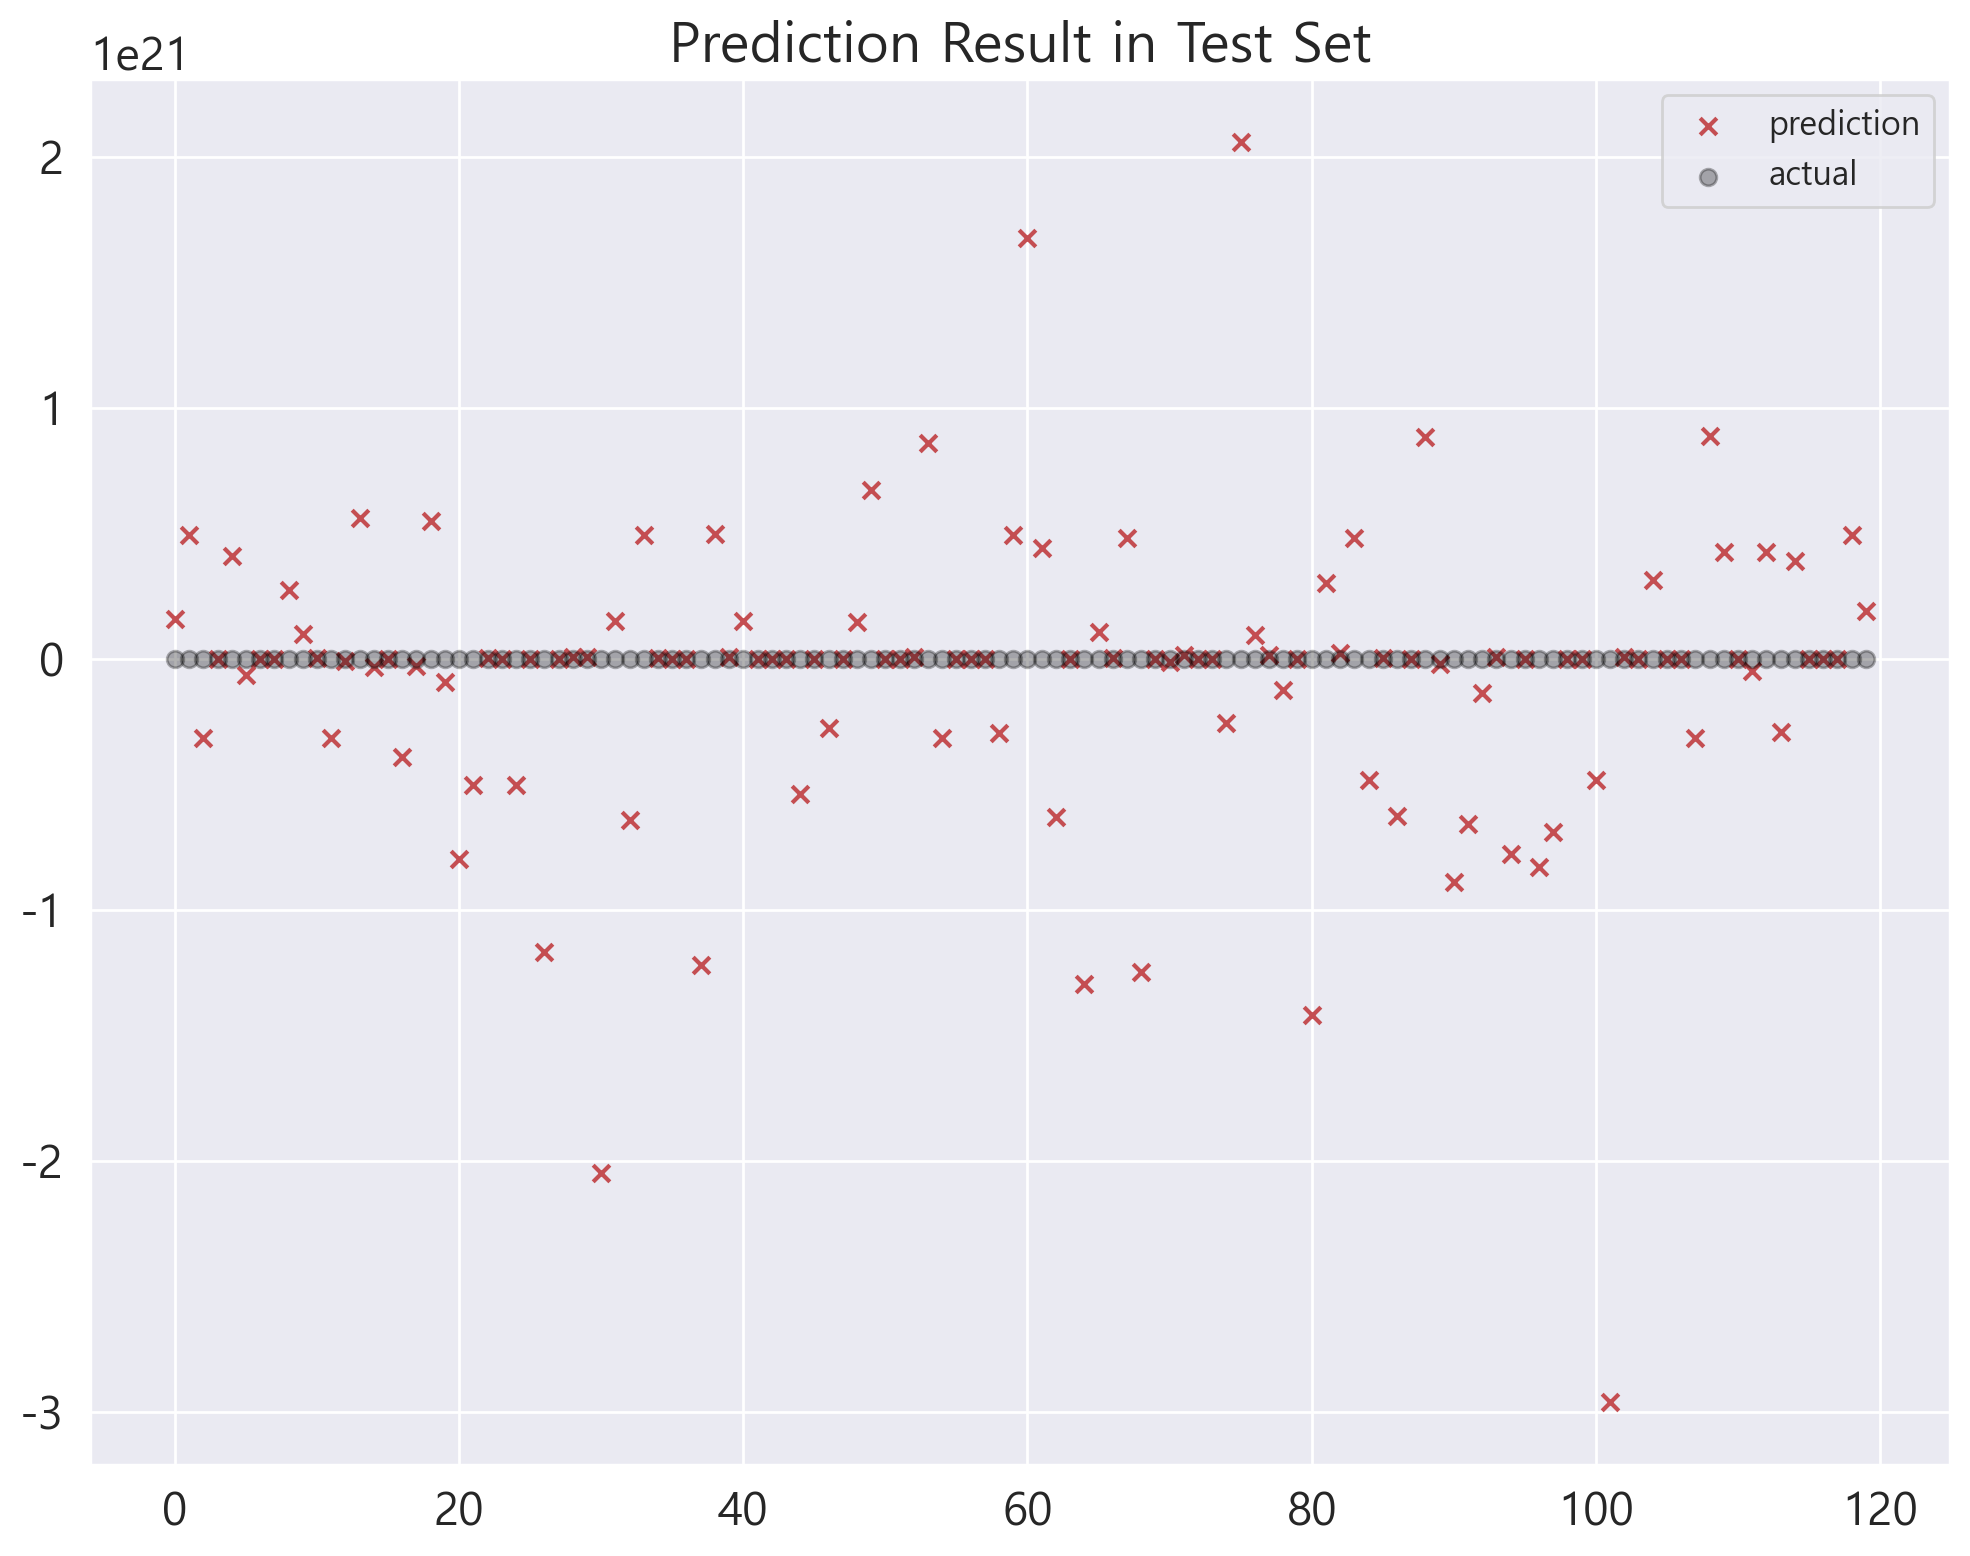

In [240]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

# 기대효과 및 인사이트

 영화관객수 예측에서 감독이 누구인지 더하는 걸 선형회귀분석으로 하는 것은 무리인 것 같다. 컬럼수가 너무 많아 무의미한 자료를 걸러내는 것이 힘들었다. 또한 더미변수들로 변환한 것들은 다중공산성이 크게 나와 문제가 있다.  

시간 남으면 더미변수들로 변환하지 않고, 숫자형 변수들로만 회귀 분석 해보기 